<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/HW4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2a

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
nest_asyncio.apply()
import stan
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd


In [ ]:
T = 900

data = pd.read_csv('LockeLowell.csv', usecols = ["t_numeric"])
time = data['t_numeric'].to_numpy()
for i in range(len(time)):
  time[i] = math.ceil(time[i])

In [ ]:
model_code = """
data {
  int N;
  real t[N];
  int T;
}
parameters {
  real<lower=0> gamma;
  real<lower=0,upper=1> R;
  real<lower=0> mu;
}
transformed parameters {
  vector[N] lam;

  lam[1] = mu;

  for (j in 2:N){
    lam[j]=mu;
    for(k in 1:(j-1)){
     lam[j] = lam[j]+R*gamma*exp(-gamma*(t[j]-t[k]));
    }
  }
}
model {
  R ~ beta(1,1);
  mu ~ exponential(.1);
  gamma ~ exponential(.1);
  for (j in 1:N){
    target+=log(lam[j]);
  }
  target+=-mu*T-R*N;
}
"""

In [ ]:

hawkes_data = {"N": len(time),"t": time,"T":T}

posterior = stan.build(model_code, data=hawkes_data, random_seed=2)

fit = posterior.sample(num_chains=1, num_samples=1000)

print(np.mean(fit['R']))
print(np.mean(fit['mu']))
print(np.mean(fit['gamma']))



Building...



Building: found in cache, done.Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 0.000242 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.42 seconds.
  Adjust your expectations accordingly!


0.5686244238285301
0.014133399482752737
0.3616042740011466


As seen above, I used the csv data of the event times of attacks between Locke St. and Lowell St. gangs in Hollenbeck Los Angeles from 1999-2002 to estimate values of recovery rate, reproduction rate, and gamma parameters. The values provided from the STAN code in alignment with our data are as follows: Reproduction: 0.5686244238285301, recovery rate: 0.014133399482752737, retaliation rate (gamma): 0.3616042740011466. These values compare to the Chicago data in RoC because the reprodction number from both are similar, though the data from Locke and Lowell is slightly higher. The gamma value from the book is 125^-1 which is estimated 0.008. This value is exponentially smaller than the gamma rate found in the Los Angeles data above of 0.36 with a higher retaliation and crime rate.

QUESTION 2b

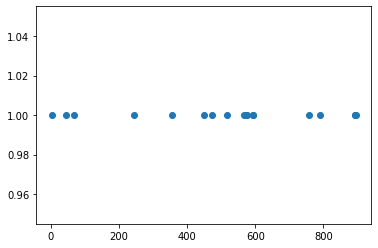

In [ ]:

gamma=0.3616042740011466
R=0.5686244238285301
mu=0.014133399482752737
T=1000

times=[]
N=np.random.poisson(mu*T)

for i in range(N):
  times.append(T*np.random.rand())

cnt=0
while(cnt<N):

  for i in range(cnt,N):
    M=np.random.poisson(R)
    cnt+=1
    for j in range(M):
      tnew=times[i]+np.random.exponential(1./gamma)
      if(tnew<T):
        times.append(tnew)
        N+=1


times=np.sort(times)

z=np.ones(times.shape)
plt.scatter(times,z)

When making a figure similar to the one in figure 14, I used the parameters of recovery rate, reproduction rate, and gamma that we found in order to generate it. This resulted in a sporadic and yet clustered graph. The events are less frequent than that of the Locke and Lowell data with additional outliers.